<a href="https://colab.research.google.com/github/zharfanw/zhongshan_dsp_python/blob/main/10_Transform_DomainSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Transform Domain System</h1>

# 1. Frequency Response



> Sinusoids are the <font color="blue">eigenfunctions</font> of LSI systems (<font color="orange">scaled</font>, not 'changed')

Knowing the <font color="orange">scaling</font> for every sinusoids with different frequency fully describes system behavior, its called <font color="red">frequency response</font>.
<br>
<font color="red">frequency response</font> describes how a system affects each pure frequency.


## Sinusoids as Eigenfunctions
A sinusoidal input $x[n]$ passes through an LTI system with impulse response
$h[n]$ to produce an output $y[n]$:
<center>
$
x[n] \to \left[ h[n] \right] \to y[n]
$
</center>
$y[n]$ is convolution between $x[n]$ and $h[n]$
<center>
$
y[n] = x[n] \circledast h[n] = \sum_{\forall m}^{} h[m] x[n-m]
$
</center>
<br>
if example complex sinusoidal input $x[n] = e^{j\omega_0 n}$, for $x[n-m]$ then
<center>
$x[n-m] = e^{j\omega_0 (n-m)}$
</center>
subtituting in convolution equation
<br>
<center>
$
y[n] = \sum_{m}h[m] e^{j\omega_0(n-m)}
$
</center>
<br>
Saparating Components
<br>
<center>
$
y[n] = \sum_{m} \underbrace{h[m] e^{-j\omega_0 m}}_{\color{orange}{H(e^{j\omega_0})}} \cdot \underbrace{e^{j\omega_0 n}}_{\color{green}{x[n]}}
$
</center>
<br>
Where:

*   $\color{orange}{H(e^{j\omega_0})}$ is the **frequency response** of the system at frequency $\omega_0$
*   $\color{green}{x[n]} = e^{j\omega_0 n}$ is the original sinusoidal input.

<br>
Then subtituting The frequency response $H(e^{j\omega_0})$ that written in polar form $H(e^{j\omega_0}) = |H(e^{j\omega_0})| e^{j\theta(\omega_0)}$ :
<center>
$
y[n] = \color{orange}{H(e^{j\omega_0})} \cdot \color{green}{x[n]} = \color{blue}{|H(e^{j\omega_0})|} \cdot e^{j(\omega_0n+\color{red}{\theta(\omega_0)})}
$
</center>


*   input sinusoid $x[n] = e^{j\omega_0 n}$ result output sinusoid $y[n] = |H(e^{j\omega_0})| \cdot e^{j(\omega_0n+\theta(\omega_0))}$ with same frequency $\omega_0$


* Output is sinusoid scaled by FT at $\omega_0$




So .
> If input x[n] is a complex sinusoid at $\omega_0$ then output of a system y[n] with <font color="orange">impulse response h[n]</font> is the <font color="green">same sinusoid</font> scaled by <font color="blue">$ |H(e^{j\omega_0})|$</font>  and phase-shifted by <font color="red">$arg\{H(e^{j\omega_0})\} = \theta(\omega_0)$</font> where <font color="orange">$ |H(e^{j\omega_0})| = DTFT\{h[n]\}$</font>

* <font color="blue">$ |H(e^{j\omega_0})|$</font> is Magnitude Response --> Gain
* <font color="red">$arg\{H(e^{j\omega_0})\} = \theta(\omega_0)$</font> is Phase Response --> Phase shift


Let We try Code it.

### Example When Input Complex Sinusoid

#### Explanation :

1.  **Impulse Response**: **h[n]** defines the system behavior in response to an impulse. It is chosen as [0.5,1.0,0.5], which represents a simple FIR filter.
2.  **Input Signal**: **x\[n\]** is a complex sinusoid defined as $e^{j\omega n}$, where $\omega = \pi/4$ radians/sample.
3.  **Convolution**:The output signal y[n] is calculated by convolving x[n] with h[n], which represents the system's response to the sinusoidal input.
4.  **Plotting**:The real and imaginary parts of both the input x[n] and output y[n] are plotted separately to observe the scaling and phase shift effects introduced by the system.

This code provides a visual representation of how an LTI system responds to a sinusoidal input, emphasizing the eigenfunction property of sinusoids in such systems.

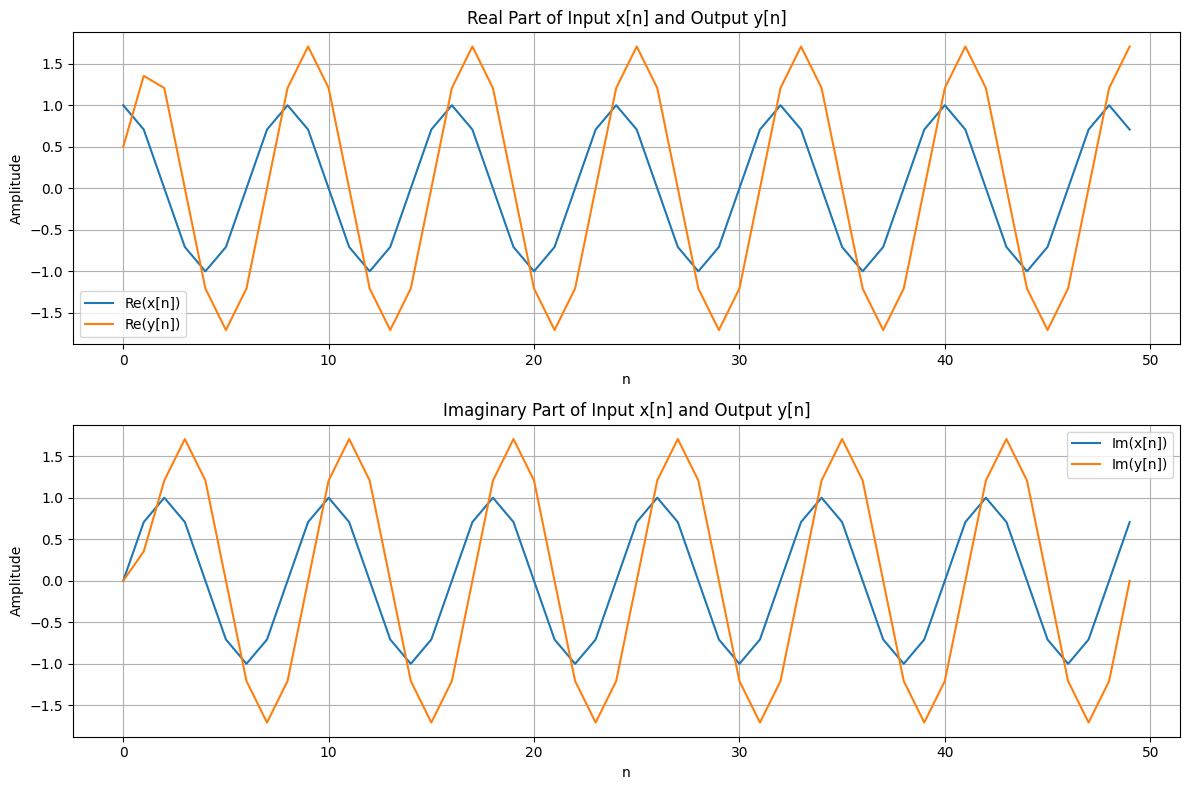

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define h[n]: the impulse response of the system
h = np.array([0.5, 1.0, 0.5])  # Example of a simple finite impulse response (FIR) filter

# Define the sinusoid frequency
omega = np.pi / 4  # Angular frequency in radians/sample

# Define the signal length
n = np.arange(0, 50)  # Discrete-time indices (50 samples)

# Define x[n]: the input signal
x = np.exp(1j * omega * n)  # Complex exponential sinusoid as the input

# Compute y[n]: the output signal using convolution of h[n] and x[n]
y = np.convolve(x, h, mode='full')[:len(n)]  # Convolve x[n] with h[n] and truncate to match length of n

# Plot the results
plt.figure(figsize=(12, 8))

# Plot the real part of the input and output
plt.subplot(2, 1, 1)
plt.plot(n, np.real(x), label="Re(x[n])")  # Real part of the input signal
plt.plot(n, np.real(y), label="Re(y[n])")  # Real part of the output signal
plt.title("Real Part of Input x[n] and Output y[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

# Plot the imaginary part of the input and output
plt.subplot(2, 1, 2)
plt.plot(n, np.imag(x), label="Im(x[n])")  # Imaginary part of the input signal
plt.plot(n, np.imag(y), label="Im(y[n])")  # Imaginary part of the output signal
plt.title("Imaginary Part of Input x[n] and Output y[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


### Example With Real Sinusoids

#### Code Explanation:

1.  **Impulse Response**:$h[n]$ represents the system's behavior. In this case, it’s a simple FIR filter with values [0.5, 1.0, 0.5].
2.  **Input Signal**:$x[n] = 2\cos(\omega n + \theta)$, which is a real sinusoid with ; Amplitude = 2, Angular frequency: $\omega = \pi/4$, Phase shift: $\theta = \pi/4$
3.  **Output Signal**:y[n] is computed by convolving x[n] with the system’s impulse response h[n].

This illustrates the filtering effect of the impulse response h[n] on the input sinusoid x[n].

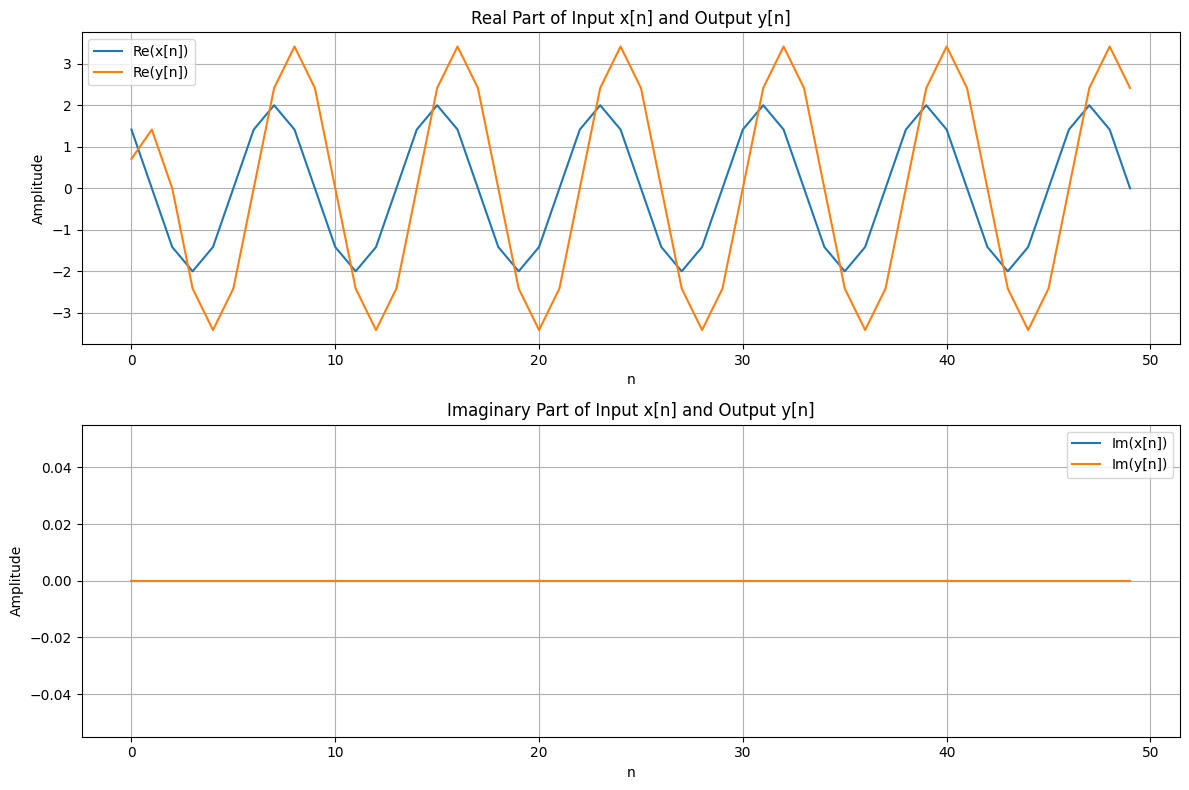

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define h[n]: the impulse response of the system
h = np.array([0.5, 1.0, 0.5])  # Example of a simple finite impulse response (FIR) filter

# Define the sinusoid's frequency and phase
omega = np.pi / 4  # Angular frequency in radians/sample
theta = np.pi / 4  # Phase angle in radians

# Define the signal length
n = np.arange(0, 50)  # Discrete-time indices (50 samples)

# Define x[n]: the input signal
x = 2 * np.cos(omega * n + theta)  # Real sinusoidal input with amplitude 2, frequency omega, and phase theta

# Compute y[n]: the output signal using convolution of h[n] and x[n]
y = np.convolve(x, h, mode='full')[:len(n)]  # Convolve x[n] with h[n] and truncate to match the length of n

# Plot the results
plt.figure(figsize=(12, 8))

# Plot the real part of the input and output
plt.subplot(2, 1, 1)
plt.plot(n, np.real(x), label="Re(x[n])")  # Real part of the input signal
plt.plot(n, np.real(y), label="Re(y[n])")  # Real part of the output signal
plt.title("Real Part of Input x[n] and Output y[n]")  # Title of the plot
plt.xlabel("n")  # Label for x-axis
plt.ylabel("Amplitude")  # Label for y-axis
plt.legend()  # Show legend
plt.grid()  # Show grid

# Plot the imaginary part of the input and output
plt.subplot(2, 1, 2)
plt.plot(n, np.imag(x), label="Im(x[n])")  # Imaginary part of the input signal
plt.plot(n, np.imag(y), label="Im(y[n])")  # Imaginary part of the output signal
plt.title("Imaginary Part of Input x[n] and Output y[n]")  # Title of the plot
plt.xlabel("n")  # Label for x-axis
plt.ylabel("Amplitude")  # Label for y-axis
plt.legend()  # Show legend
plt.grid()  # Show grid

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


### Example with Moving Average

Generate input signal
<br>
$x[n] = sin(0.1n) + 0.2 sin(1.5n)$

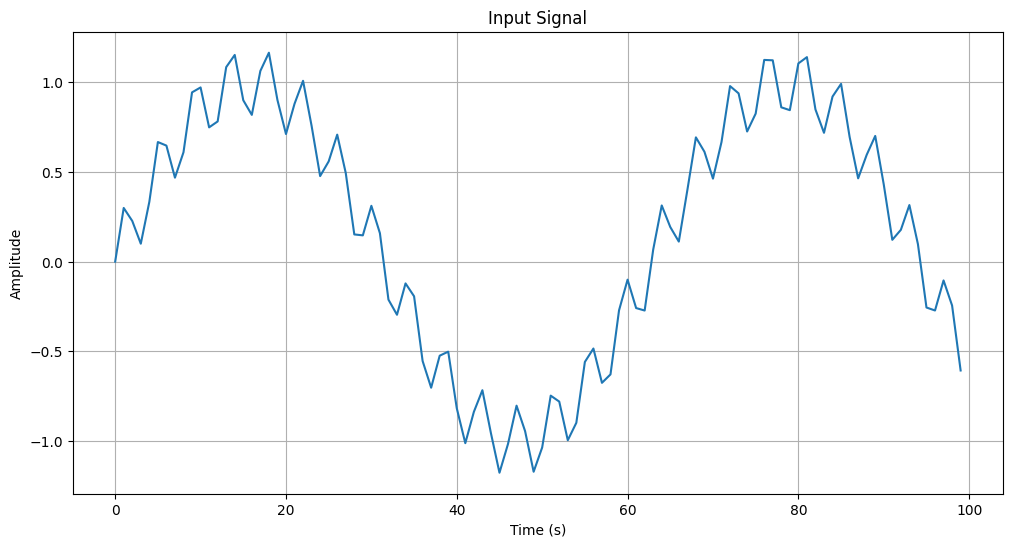

In [39]:
# Input signal parameters
# fs = 1  # Sampling frequency (adjust as needed)
n = np.arange(0, 100)  # Time vector

# Generate input signals
x1 = np.sin(0.1 * n)
x2 = 0.2 * np.sin(1.5 * n)
x = x1 + x2
# Plot input signal
plt.figure(figsize=(12, 6))
plt.plot(n, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Input Signal')
plt.grid(True)
plt.show()

Generate Moving Average Filter with Impulse Response, then convolute it with input Signal

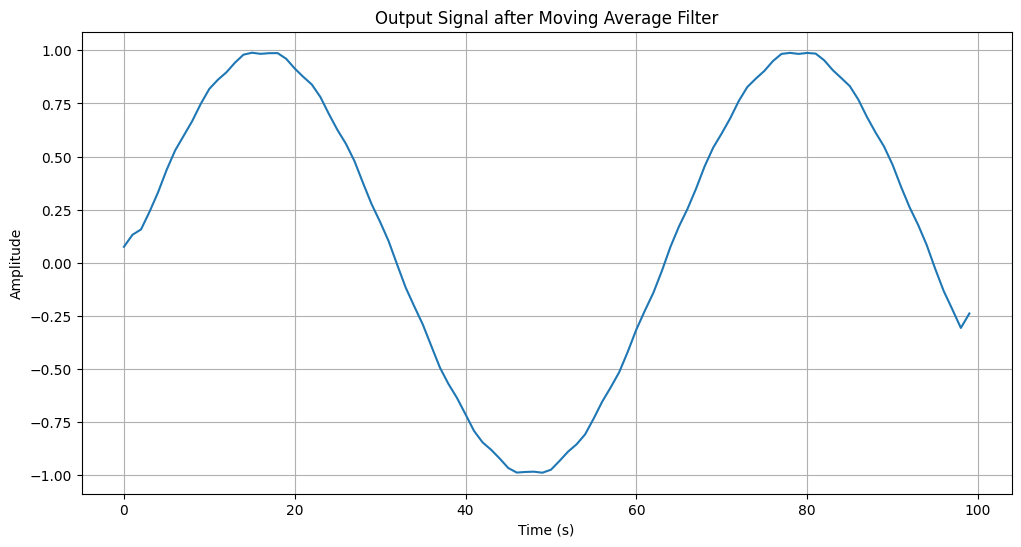

In [40]:
# Moving average filter
h = np.array([1/4, 1/4, 1/4, 1/4])

# Convolution
y = np.convolve(x, h, mode='same')

# Plot output signal
plt.figure(figsize=(12, 6))
plt.plot(n, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Output Signal after Moving Average Filter')
plt.grid(True)
plt.show()

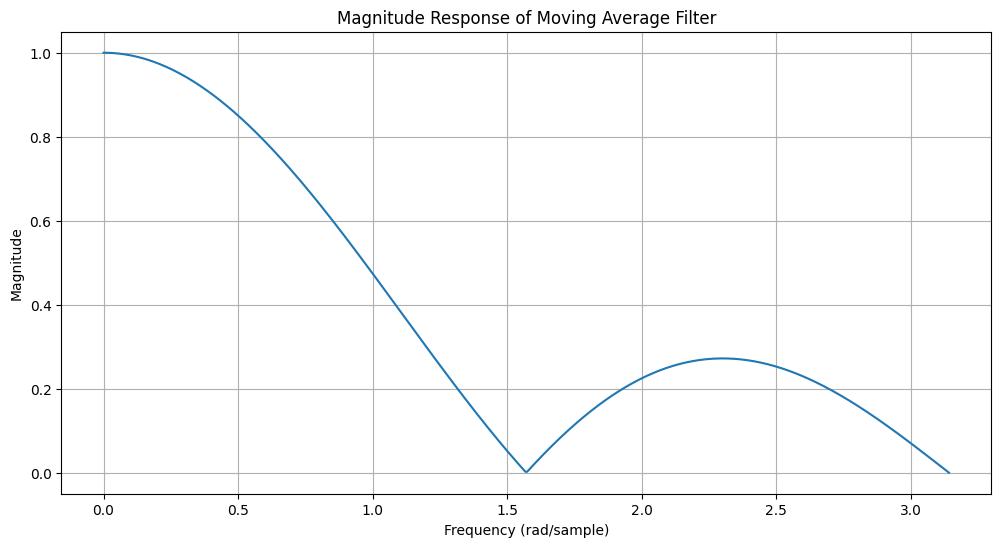

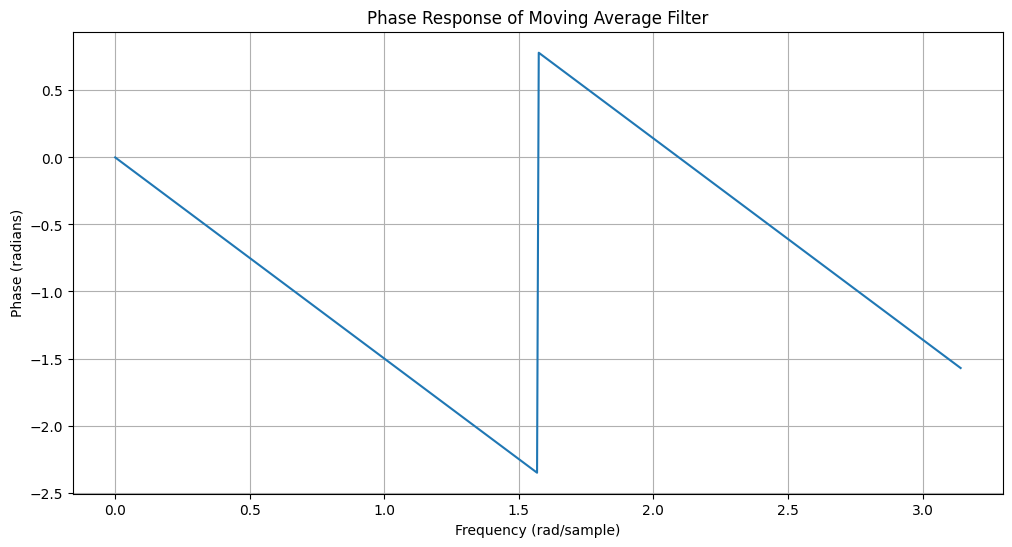

In [41]:
# Frequency response of the moving average filter
N = len(h)
omega = np.linspace(0, np.pi, 500)
H = np.zeros(len(omega), dtype=complex)

## DTFT H
for i in range(len(omega)):
  H[i] = np.sum(h * np.exp(-1j * omega[i] * np.arange(N)))

magnitude_response = np.abs(H)
phase_response = np.angle(H)

# Plot magnitude response
plt.figure(figsize=(12, 6))
plt.plot(omega, magnitude_response)
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')
plt.title('Magnitude Response of Moving Average Filter')
plt.grid(True)
plt.show()

# Plot phase response
plt.figure(figsize=(12, 6))
plt.plot(omega, phase_response)
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Phase (radians)')
plt.title('Phase Response of Moving Average Filter')
plt.grid(True)
plt.show()

## Transient/Steady State

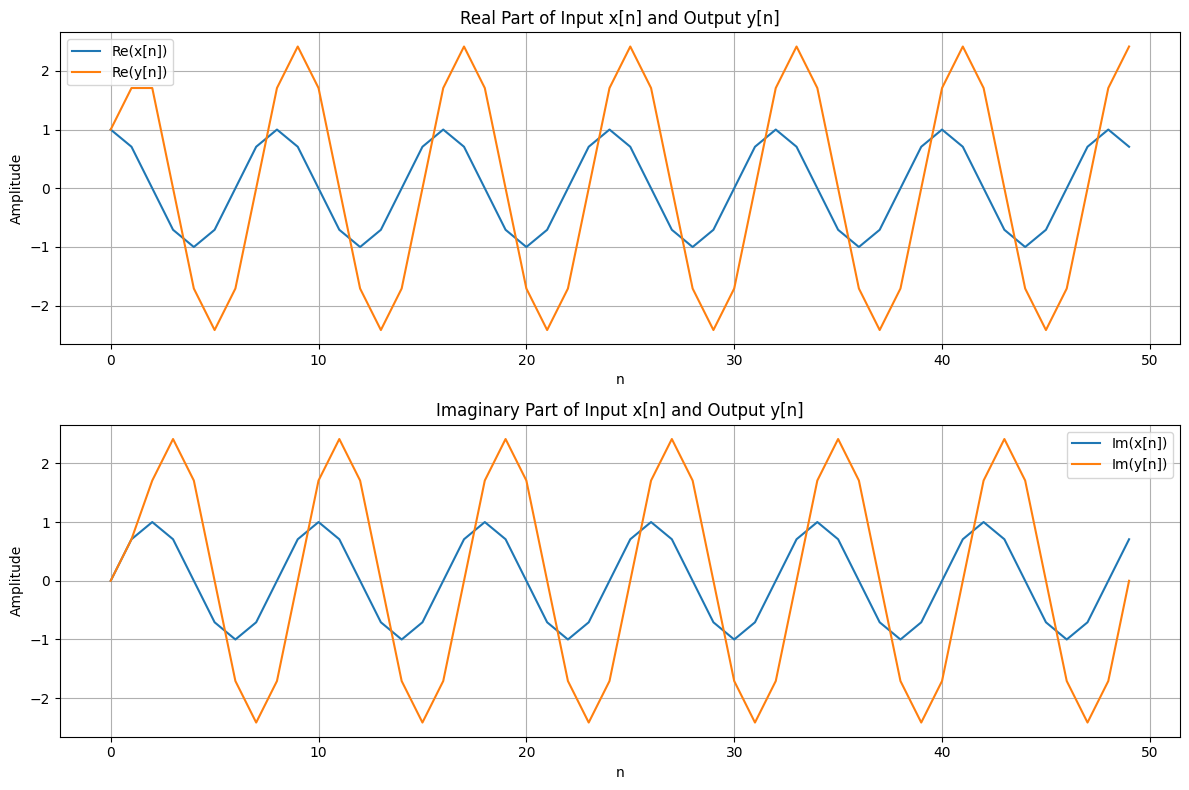

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Impulse response h[n]
h = np.array([1, 1, 1])  # Example: h[n] = [1, 1, 1]
L = len(h)  # Length of h[n]

# Input signal parameters
omega_0 = np.pi / 4  # Angular frequency in radians/sample
n = np.arange(0, 50)  # Time indices (0 to 49)

# Input signal: Complex sinusoid multiplied by unit step
x = np.exp(1j * omega_0 * n)  # e^(j*omega_0*n)

# Compute the output y[n]
y = np.zeros(len(n), dtype=complex)  # Initialize y[n] as complex array
for i in range(len(n)):
    # Perform summation for min(i, L-1)
    y[i] = np.exp(1j * omega_0 * i) * np.sum(h[:min(i, L-1) + 1] * np.exp(-1j * omega_0 * np.arange(min(i, L-1) + 1)))

# Plotting
plt.figure(figsize=(12, 8))

# Plot real part of x[n] and y[n]
plt.subplot(2, 1, 1)
plt.plot(n, np.real(x), label="Re(x[n])")
plt.plot(n, np.real(y), label="Re(y[n])")
plt.title("Real Part of Input x[n] and Output y[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

# Plot imaginary part of x[n] and y[n]
plt.subplot(2, 1, 2)
plt.plot(n, np.imag(x), label="Im(x[n])")
plt.plot(n, np.imag(y), label="Im(y[n])")
plt.title("Imaginary Part of Input x[n] and Output y[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# 2. Transfer Function (TF)

## Relationship between LCCDE, Z Transform, and Frequency Response


### LCCDE
An LCCDE describes the input-output relationship of a discrete-time Linear Time-Invariant (LTI) system:
<br>
<center>
$
\sum_{k=0}^{N} d_ky[n-k] = \sum_{k=0}^{N} p_ky[n-k]
$
</center>



### Z Transform
<center>
$
\sum_{k=0}^{N} d_kz^{-k}Y(Z) = \sum_{k=0}^{N} p_kz^{-k}X(Z)
$
</center>


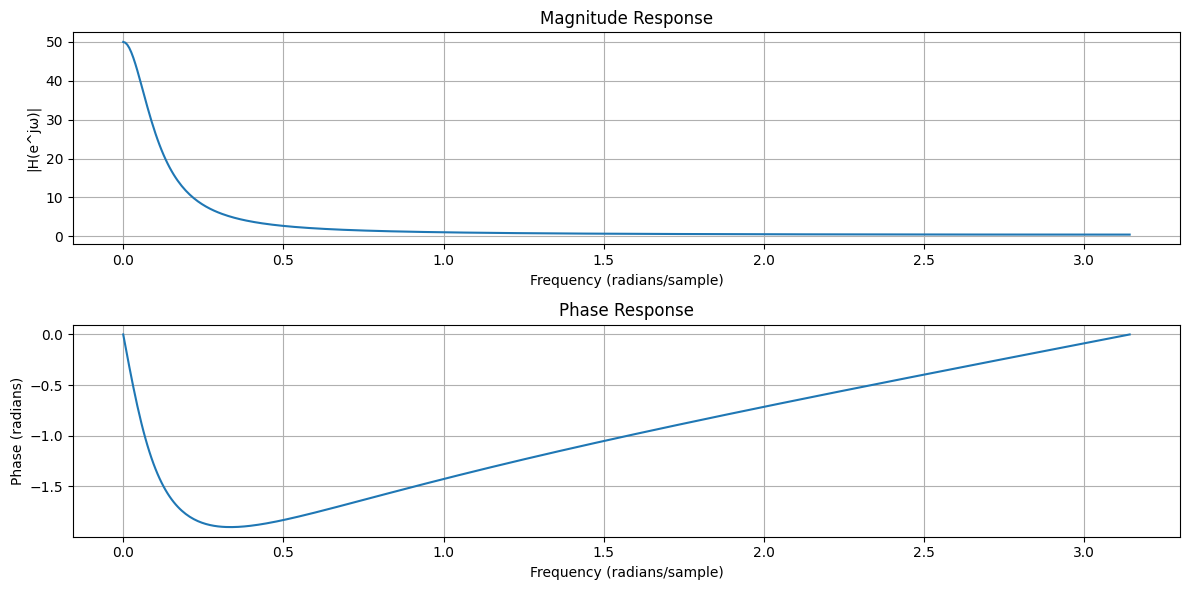

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Koefisien numerator dan denominator
b = [1, -0.5]         # Numerator coefficients
a = [1, -1.8, 0.81]   # Denominator coefficients

# Frekuensi sudut (dalam radian/sampel)
omega = np.linspace(0, np.pi, 500)  # Dari 0 hingga π (frekuensi normal)

# Frequency response
H = np.zeros_like(omega, dtype=complex)
for i, w in enumerate(omega):
    z = np.exp(1j * w)  # Unit circle
    numerator = sum(b[k] * z**(-k) for k in range(len(b)))
    denominator = sum(a[k] * z**(-k) for k in range(len(a)))
    H[i] = numerator / denominator

# Magnitude dan phase
magnitude = np.abs(H)
phase = np.angle(H)

# Plot hasil
plt.figure(figsize=(12, 6))

# Magnitude response
plt.subplot(2, 1, 1)
plt.plot(omega, magnitude)
plt.title("Magnitude Response")
plt.xlabel("Frequency (radians/sample)")
plt.ylabel("|H(e^jω)|")
plt.grid()

# Phase response
plt.subplot(2, 1, 2)
plt.plot(omega, phase)
plt.title("Phase Response")
plt.xlabel("Frequency (radians/sample)")
plt.ylabel("Phase (radians)")
plt.grid()

plt.tight_layout()
plt.show()


<ipython-input-3-68f80823cf64>:22: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(np.real(poles), np.imag(poles), s=100, marker='x', label="Poles", edgecolor='k')


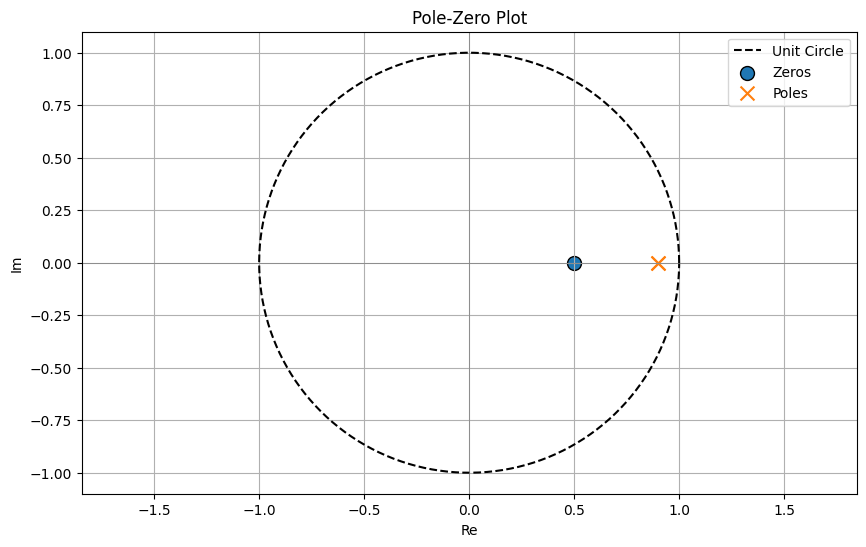

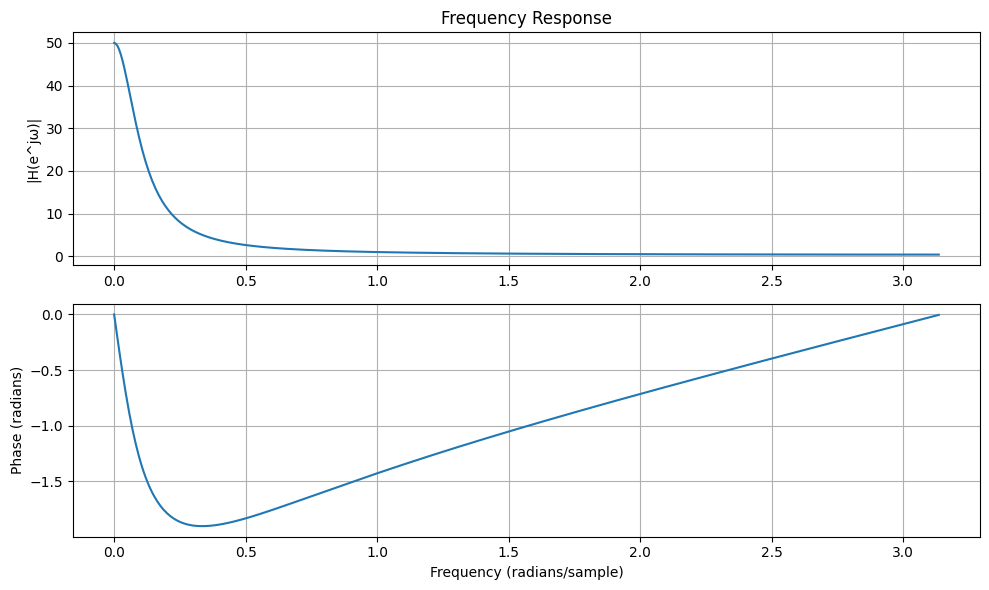

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, tf2zpk

# Definisi transfer function
b = [1, -0.5]         # Numerator coefficients
a = [1, -1.8, 0.81]   # Denominator coefficients

# Hitung zeros, poles, dan gain
zeros, poles, gain = tf2zpk(b, a)

# Plot z-plane
plt.figure(figsize=(10, 6))

# Unit circle
theta = np.linspace(0, 2 * np.pi, 500)
unit_circle = np.exp(1j * theta)
plt.plot(np.real(unit_circle), np.imag(unit_circle), 'k--', label="Unit Circle")

# Plot zeros dan poles
plt.scatter(np.real(zeros), np.imag(zeros), s=100, marker='o', label="Zeros", edgecolor='k')
plt.scatter(np.real(poles), np.imag(poles), s=100, marker='x', label="Poles", edgecolor='k')

plt.title("Pole-Zero Plot")
plt.xlabel("Re")
plt.ylabel("Im")
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

# Plot frequency response
w, h = freqz(b, a, worN=500)
plt.figure(figsize=(10, 6))

# Magnitude response
plt.subplot(2, 1, 1)
plt.plot(w, np.abs(h))
plt.title("Frequency Response")
plt.ylabel("|H(e^jω)|")
plt.grid()

# Phase response
plt.subplot(2, 1, 2)
plt.plot(w, np.angle(h))
plt.xlabel("Frequency (radians/sample)")
plt.ylabel("Phase (radians)")
plt.grid()

plt.tight_layout()
plt.show()


# 3. Phase Delay and Group Delay

# Task
$
H(e^{j\omega}) = \left\{ \begin{array}{ l l }
    \left| H(e^{j0.1}) \right| \sim 1 \\
    \left| H(e^{j0.4}) \right| \sim 0 \\
  \end{array} \right.
$

